In [132]:
import pandas as pd # for dataframe manipulation
import numpy as np
import matplotlib.pyplot as plt # for plotting

from numpy import *

Load the data file for the 5-year Swedish death rates for the time period 1751 to 2017

In [3]:
data = pd.read_csv('datasets/Swed_Mx_1x5.csv', sep=' ', header=0,
                   dtype={'Male':np.float64, 'Female':np.float64, 'Total':np.float64},
                   skip_blank_lines=True, infer_datetime_format=True, na_values='.')
# Convert the NaN's to 0 as they were initially supposed to be 0
# data.fillna(value=0)
data.head() # Reasonableness check

# write the cleaned data to a .txt file
data.to_csv('datasets/clean_data.csv', sep=',', encoding='utf-8')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5994 entries, 0 to 5993
Data columns (total 5 columns):
Year      5994 non-null object
Age       5994 non-null int64
Female    5763 non-null float64
Male      5657 non-null float64
Total     5769 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 234.2+ KB


Visualize the trend of the data

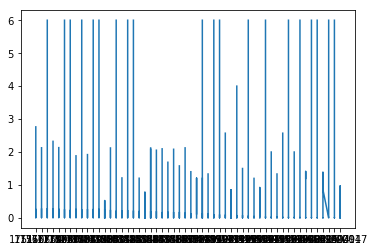

In [32]:
plt.plot(data.Year, data.Male)

# Singular Value Decomposition

In [13]:
M = data.iloc[:,2:5]
M = M.dropna(axis=0)
M = M[M.Female != 0]
M = M[M.Male != 0]
M = M[M.Total != 0]

M['log_Female'] = np.log(M['Female'])
M['log_Male'] = np.log(M['Male'])
M['log_Total'] = np.log(M['Total'])
M_sum = M.sum(axis=0)

MTotalLog = M['log_Total']
MTotalLogSum = M_sum['log_Total']
T = len(M.Total)
aHat = (1/T) * MTotalLogSum
aHat

-3.884667209918491

Create a matrix Z x , t for estimating b x and k t , where Z x , t = ln ( m x , t ) − a x = b x k t

In [110]:
i = 0
years_index = []
while i <5994:
    if i%111 == 0:
        years_index.append(i)
        i += 1
    else:
        i += 1
len(years_index)

54

In [111]:
years = data['Year'][years_index]

In [142]:
source = np.log(data.loc[:,'Total'].values) - aHat
total = source.reshape(54,111)
total[np.isnan(total)] = 0
total = total.transpose()

/home/jared/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [143]:
# used upto age 90
total_df = pd.DataFrame(total).loc[:89]
# total_df.set_index([pd.Index(years)])
total_sum = np.sum(total_df)
total_df.head()
total_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
85,2.138848,2.289073,2.305419,2.380080,2.535144,2.344447,2.418758,2.461829,2.474252,2.457755,...,1.968235,1.921984,1.872204,1.807926,1.717478,1.679363,1.618086,1.538966,1.466559,1.427380
86,2.153632,2.323634,2.304278,2.381178,2.537928,2.427053,2.449624,2.500391,2.516939,2.493280,...,2.062259,2.019188,1.929833,1.904013,1.841743,1.790786,1.755287,1.667672,1.592310,1.551705
87,2.168763,2.360030,2.296731,2.382738,2.534871,2.509685,2.466928,2.555252,2.546244,2.530321,...,2.137959,2.125342,2.036090,2.006061,1.939757,1.894430,1.860925,1.795628,1.731295,1.679045
88,2.190194,2.405832,2.291354,2.394052,2.532024,2.598403,2.474158,2.636049,2.565568,2.583596,...,2.232640,2.215182,2.145081,2.117077,2.054308,2.010104,1.984075,1.919154,1.852621,1.800318
89,2.231779,2.470356,2.311200,2.427654,2.545722,2.702700,2.498541,2.751153,2.605184,2.676459,...,2.312487,2.287183,2.251311,2.204308,2.168579,2.114145,2.094217,2.034539,1.996547,1.955403


In [151]:
u, s, vh = np.linalg.svd(total_df, full_matrices=True)

# where U representing the age component, L(s) is the singular values and V(vh) representing the time component.

In [156]:
bHat = u[:,1]
kHat = (s * vh)[:,1]
bHat.shape, kHat.shape

((90,), (54,))

In [145]:
u.shape, s.shape, vh.shape

((90, 90), (54,), (54, 54))